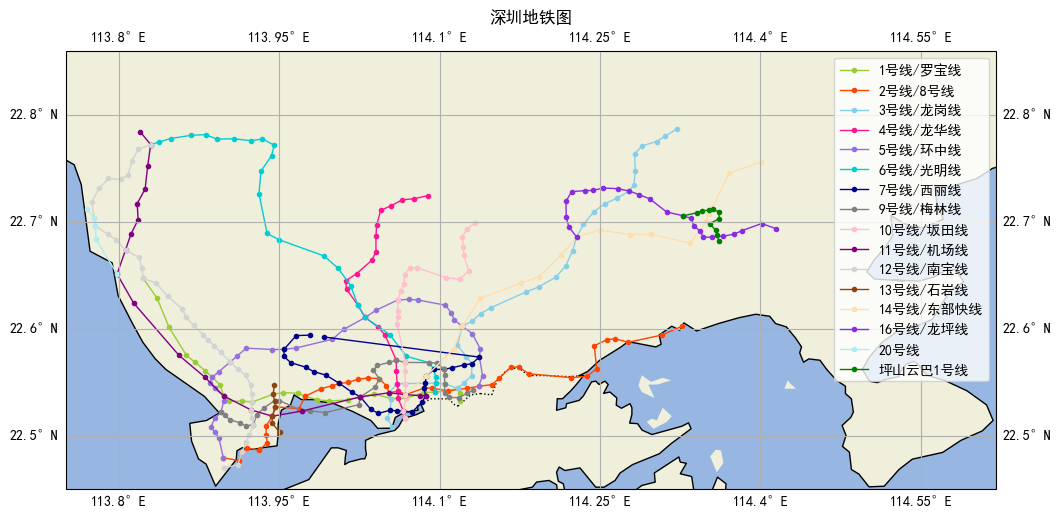

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 读取Excel文件
file_path = "深圳.xlsx" 
df = pd.read_excel(file_path)

# 提取数据
longitudes = df.iloc[:, 4]  # 第五列是经度
latitudes = df.iloc[:, 5]   # 第六列是纬度
line_names = df.iloc[:, 8]  # 第九列是线路名称

# 创建地图
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置地图范围（深圳的大致经纬度范围）
ax.set_extent([113.75, 114.62, 22.45, 22.86], crs=ccrs.PlateCarree())

# 添加地理特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

line_colors = {
    '1号线/罗宝线': '#9ACD32',  # 1号线嫩绿色
    '2号线/8号线': '#FF4500',  # 2号线橙褐色
    '3号线/龙岗线': '#87CEEB',  # 3号线天蓝色
    '4号线/龙华线': '#FF1493',  # 4号线玫瑰红
    '5号线/环中线': '#9370DB',  # 5号线浅紫色
    '6号线/光明线': '#00CED1',  # 6号线青色
    '7号线/西丽线': '#00008B',  # 7号线深蓝色
    '9号线/梅林线': '#808080',  # 9号线深灰色
    '10号线/坂田线': '#FFC0CB',  # 10号线粉色
    '11号线/机场线': '#800080',  # 11号线深紫色
    '12号线/南宝线': '#D3D3D3',  # 12号线浅灰色
    '13号线/石岩线': '#8B4513',  # 13号线屎黄色
    '14号线/东部快线': '#FFDEAD',  # 14号线浅黄色
    '16号线/龙坪线': '#8A2BE2',  # 16号线蓝紫色
    '20号线': '#AFEEEE',  # 20号线浅蓝绿色
    '坪山云巴1号线': '#008000',  # 坪山云巴1号线绿色
}

# 绘制地铁线路
for line_name, color in line_colors.items():
    # 筛选当前线路的站点
    line_data = df[df.iloc[:, 8] == line_name]
    lons = line_data.iloc[:, 4]  # 经度
    lats = line_data.iloc[:, 5]  # 纬度
    ax.plot(lons, lats, marker='o', color=color, label=line_name, markersize=3, linewidth=1)

# 添加图例
ax.legend(loc='upper right')

# 添加网格线
ax.gridlines(draw_labels=True)

# 显示地图
plt.title('深圳地铁图')
plt.savefig("shenzhen.jpg", dpi = 300)
plt.show()